In [6]:
import pickle
import os
import numpy as np

In [7]:
model_paths = {
    'mae':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_UPEU_dcd_mae_fold/s_2',
    'mle':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_UPEU_dcd_mle_fold/s_2',
    'maew':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_UPEU_dcd_maew_fold/s_2',
   # 'mae_seg_loss':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-17_SJWC_additional_mae_loss/s_2/'
}
model_paths = {
   'gmm':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_QXFB_kernel_GMM_fold/s_2',
   'spiral':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-01-13_QXFB_kernel_spiral_fold/s_2',
}

model_paths = {
   'baseline':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MYCZ_baseline/s_2/',
   'mask_augmentation':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MYCZ_mask_augmentation/s_2/',
   'smooth_labels':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MYCZ_smooth_labels/s_2/',
   'no_finetuning':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-08_HAYI_no_finetuning/s_0/',
'classification_deep':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MHYH_classification_deep/s_2',
'classification_nondeep':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-09_MHYH_classification_non_deep/s_2',


}
model_paths = {
       'baseline_dcd':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-21_UBBV_baseline_dcd/s_2/',
    'fine_dist_mask':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-20_DYTG_fine_dist_mask_aug/s_2',
   '+classification'  :    '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-02-20_DYTG_full_classification/s_2',
   'baseline_dcd_loss_stop':'/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/23-02-17_LOHR_baseline_dcd/s_2/',
    'fine_dist_mask_loss_stop':'/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/old_full/s_2',
   '+classification_loss_stop'  :    '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/old_full_class/s_2',

}

model_paths = {'nnunet':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_nnunet/s_0',
               '+distance':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_distance/s_0',
               '+finetuning':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DEDL_finetuning/s_2',
               '+classification':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_classification/s_0',
               '+large_augmentation':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_large_augmentation/s_0',
               '+mask_augmentation':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DHAM_mask_augmentation/s_0',
               'full_model':'/rds/project/kw350/rds-kw350-meld/experiments_graph/kw350/23-02-22_DEDL_finetuning_classification_mask_large/s_2',
}

In [8]:
aucs = []
labels= [] 
for model in model_paths.keys():
    
    for fold in np.arange(5):
        fname = os.path.join(model_paths[model],f'fold_0{fold}','results','roc_auc.pickle')
        with open(fname, 'rb') as handle:
            b = pickle.load(handle)
        # optimal_threshold(b)
        
        aucs.append(b['auc_plus'])
        labels.append(model)



In [9]:
import ptitprince as pt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt


In [14]:
df[df['models']=='full_model'].reset_index()

,index,AUC,models
0,30,0.803231,full_model
1,31,0.742647,full_model
2,32,0.677694,full_model
3,33,0.721237,full_model
4,34,0.680589,full_model


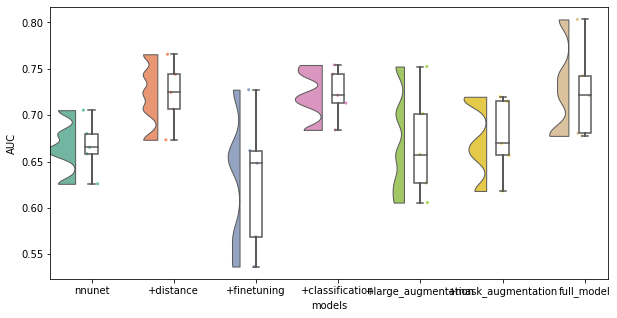

In [10]:
df = pd.DataFrame(np.vstack([aucs,labels]).T,columns=['AUC','models'],)

df['AUC'] = df['AUC'].astype(float)
fig, ax = plt.subplots(1,1,figsize=(10,5))
pt.RainCloud(data=df, x='models',y='AUC',ax=ax)
ttests = np.zeros((len(model_paths.keys()),len(model_paths.keys())))
for m_i,model in enumerate(model_paths.keys()):
    for m2_i,model2 in enumerate(model_paths.keys()):
        ttests[m_i,m2_i] = st.ttest_rel(df['AUC'][df['models']==model],
        df['AUC'][df['models']==model2]
        )[0]

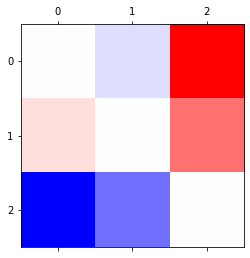

In [8]:
plt.matshow(np.nan_to_num(ttests),cmap='bwr')

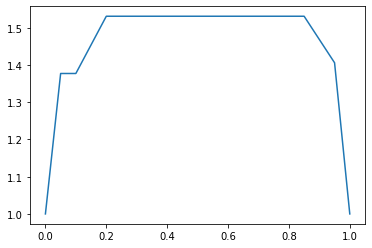

In [84]:
youden = b['sensitivity_plus']/max(b['sensitivity_plus'])+b['specificity']/max(b['specificity'])

plt.plot(b['thresholds'],youden)

In [9]:
def optimal_threshold(b):
    youden = b['sensitivity_plus']/max(b['sensitivity_plus'])+b['specificity']/max(b['specificity'])
    optimal_thresh = b['thresholds'][np.max(np.where(youden==np.max(youden)))]
    print(optimal_thresh)